The Basic WordCount example
----------------------------

The code below counts occurences of words in given text file and displays the first 10 entries. 
The entries in the original code are sorted alfabetically in ascending order so we expect to see entries like:

    _bons = 1
    a = 783
    abandon = 2
    abandoned = 2
    abandonment = 1
    abate = 1
    ... 
    
Modify the code below to display top 20 most frequest words orderd in the order of frequency (descending).
The correct output should be: 

    the = 3111
    to = 2116
    and = 1938
    of = 1802
    in = 994
    ....

_Hints:_ 

* use `[Ctrl+Enter]` to execute code in a cell
* `sortByKey()` argument determines whether the order is ascending (`True`) or descending (`False`) 
* the following expression can be used to reverse a tuple:  `lambda (a,b):  (b,a)`

In [1]:
import re
wordCountRDD = sc.textFile('spark-data/prince_by_machiavelli.txt') \
    .flatMap(lambda s: re.split('[^A-Za-z_]+', s)) \
    .filter(lambda w:len(w) > 0) \
    .map(lambda w:(w.lower(),1)) \
    .reduceByKey(lambda a,b: a + b) \
    .map(lambda (a,b):  (b,a))\
    .sortByKey(False) \
    .map(lambda (a,b):  (b,a))\

In [2]:
for word, count in wordCountRDD.take(20):
    print "%s = %s" % (word, count)

the = 3111
to = 2116
and = 1938
of = 1802
in = 994
he = 922
a = 783
that = 746
his = 640
it = 586
by = 506
not = 499
with = 497
be = 471
for = 445
they = 442
is = 439
him = 417
have = 390
was = 380


As a bonus we can use `matplotlib` to visualise the results.

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


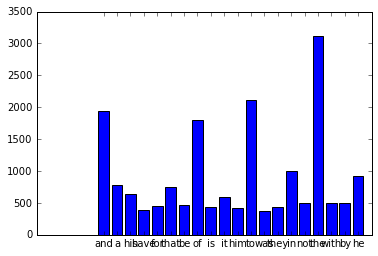

In [4]:
import matplotlib.pyplot as plt
data = dict(wordCountRDD.take(20))
plt.bar(range(len(data)), data.values(), align='center')
plt.xticks(range(len(data)), data.keys())
plt.show()